In [ ]:
# while binary classifier classify between two classes
# multiclass classifier also called multinominal classifier, can distinguish between more than two classes 
# see page 100 

# some algo such as SGDClassifier, Random Forest Classifier and navie Bayes classifiers can handle multiclass problem
# SVM and Logistic Regression are strictly binary classifier however there are strategies to handle multiclass problem with SVM

# Support Vector Machine with Multiclass classifier 

In [ ]:
# there are two methods to train a multiclass classifier 

# FIRST, we can classify the digits into 10 classes from 0 to 9, and train 10 binary classifiers
# there will be one binary classifier for each classifiers
# when we classify an image, we retreive the decision score from each classifier and select the class where the classifier assign the highest scores
# this method is called the one-verse-rest (OvR) / one-verse-all method 

# SECOND, we can train a binary classifier for every pair of digits
# one binary classifier to distinguish between 0s and 1s 
# another binary classifier to distinguish 0s and 2s and .....
# if there are N classes, you will need to train [N(N-1)]/2 classifiers 
# when we classify an image, the image is run through all 45 classifiers and see which class win the most duels
# this method is called the one-verse-one (OvO) method 
# the main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish

# SVM scale poorly with the size of the training set
# for these algo (SVM), OvO strategy is preferred because it is faster to train many classifiers on small training set than to train a few classifier with large training set

In [1]:
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)

y, X = mnist["target"], mnist["data"]
y = y.astype(np.uint8)

y_train, y_test = y[:60000], y[60000:]
X_train, X_test = X[:60000], X[60000:]

In [7]:
some_digit = X[0]

In [5]:
from sklearn.svm import SVC 

svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
svc_classifier.predict([some_digit]) # this will take ertvery long to finish 

# # refer to page 101THIS WILL TAKE VERY LONG TO EXECUTE......DO NOT EXECUTE 

In [7]:
# if you want to force SL to use OVO or OVR, you can use the OVO classifier or the OVR classifier from from sklearn.multiclass

from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

ovr_classifier = OneVsRestClassifier(SVC())
ovr_classifier.fit(X_train,y_train) # THIS WILL TAKE VERY LONG TO EXECUTE .... DO NOT EXECUTE 

# SGDClassifier for multiclass problem

In [2]:


from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train) # this take less timebu but still longer than single class-class classifier to execute than the above, but still longer than binary classifier

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
sgd_classifier.classes_ # this returns the classes for the problem

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
sgd_classifier.decision_function([some_digit])
# this will return the decision score for the 10 classes 

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [6]:
sgd_classifier.predict([some_digit]) # it seems that the classifier got the first digit wrong, it should be a 5

array([3], dtype=uint8)

In [16]:
y[0]

5

In [18]:
from sklearn.model_selection import cross_val_predict, cross_val_score

eval_score_accuracy = cross_val_score(sgd_classifier, X_train, y_train, cv = 3, scoring = "accuracy")
print(np.mean(eval_score_accuracy))

0.8760007739838779


In [19]:
eval_score_accuracy

array([0.87082583, 0.87089354, 0.88628294])

In [20]:
# we can improve the score further by scaling the inputs

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [21]:
eval_score_accuracy_scaled_data = cross_val_score(sgd_classifier,X_train_scaled, y_train, cv = 3, scoring = "accuracy")
print(np.mean(eval_score_accuracy_scaled_data))

# we managed to increase accuracy by 3%
# a random classifier would only get 10% accuracy

0.8975499011527338


# Error Analysis

In [ ]:
# After we found a promising model, we can find ways to improve on it by analyzing the type of mistakes the model makes 

In [22]:
# First we look at the confusion matrix 
from sklearn.metrics import confusion_matrix

y_train_prediction = cross_val_predict(sgd_classifier, X_train_scaled, y_train, cv = 3)

array([[5576,    0,   21,    6,    9,   43,   37,    6,  224,    1],
       [   0, 6398,   38,   23,    4,   44,    4,    8,  213,   10],
       [  26,   27, 5242,   90,   71,   26,   62,   36,  371,    7],
       [  24,   17,  117, 5220,    2,  208,   28,   40,  405,   70],
       [  12,   14,   48,   10, 5192,   10,   36,   26,  330,  164],
       [  28,   15,   33,  166,   55, 4437,   76,   14,  538,   59],
       [  30,   14,   41,    2,   43,   95, 5560,    4,  128,    1],
       [  21,    9,   52,   27,   51,   12,    3, 5693,  188,  209],
       [  17,   63,   46,   90,    3,  125,   25,   10, 5429,   43],
       [  23,   18,   31,   66,  116,   32,    1,  179,  377, 5106]],
      dtype=int64)

In [24]:
con_matrix = confusion_matrix(y_train, y_train_prediction)
con_matrix

array([[5576,    0,   21,    6,    9,   43,   37,    6,  224,    1],
       [   0, 6398,   38,   23,    4,   44,    4,    8,  213,   10],
       [  26,   27, 5242,   90,   71,   26,   62,   36,  371,    7],
       [  24,   17,  117, 5220,    2,  208,   28,   40,  405,   70],
       [  12,   14,   48,   10, 5192,   10,   36,   26,  330,  164],
       [  28,   15,   33,  166,   55, 4437,   76,   14,  538,   59],
       [  30,   14,   41,    2,   43,   95, 5560,    4,  128,    1],
       [  21,    9,   52,   27,   51,   12,    3, 5693,  188,  209],
       [  17,   63,   46,   90,    3,  125,   25,   10, 5429,   43],
       [  23,   18,   31,   66,  116,   32,    1,  179,  377, 5106]],
      dtype=int64)

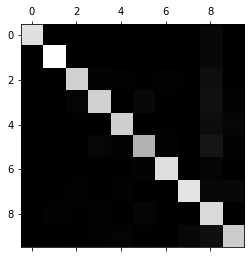

In [25]:
# it will be more useful to look at an image representation of the confusion matrix
plt.matshow(con_matrix, cmap = plt.cm.gray)
plt.show()

# rows represent the actual classes 
# columns represent predicted classes

# since most images are on the main diagional, which means that they were classified corretly

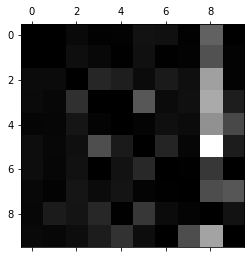

In [27]:
# lets focus on the errors
# we first need to divide each value in the confusion matrix by the number of images in each of the classes 
## so that you can compare error rates instead of absolute numbers of errors

row_sums = con_matrix.sum(axis = 1, keepdims = True)
norm_con_matrix = con_matrix / row_sums

# fill the diagional with zeros to keep only the errors and plot the results 
np.fill_diagonal(norm_con_matrix,0)
plt.matshow(norm_con_matrix, cmap = plt.cm.gray)
plt.show()

# rows are the actual class 
# columns are the predicted class

# Observation 
#1 the column for class 8 looks pretty bright as compared to the less of the columns, which means that many images get missclassified as 8s
#2 the row for class 8 is not that bad, which tells us that the actual 8 in general gets properly classified as 8s

In [36]:
import matplotlib

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

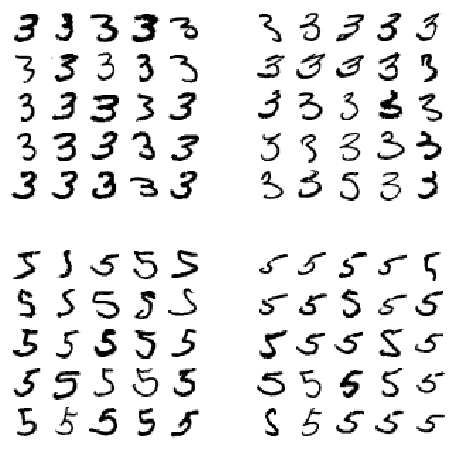

In [37]:
# lets analyze the individual errors 

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_prediction == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_prediction == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_prediction == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_prediction == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221);plot_digits(X_aa[:25], images_per_row = 5)
plt.subplot(222);plot_digits(X_ab[:25], images_per_row = 5)
plt.subplot(223);plot_digits(X_ba[:25], images_per_row = 5)
plt.subplot(224);plot_digits(X_bb[:25], images_per_row = 5)
plt.show()

In [ ]:
# the two columns on the left are classified as 3 by the model 
# the two columns on the right are classified as 5 by the model 

# Observations -- most of the misclassified images seems like obvious mistake to the human eye 
# the SGDClassifier which is a linear model, assign a weight per class to each pixel 
# when it sees a new image, it just sums up the weighted pixel intensities to get a score for each class

# since 3s and 5s only differ only be a few pixels, this model will easily confuse 3s and 5s